## Simulating observed spectra

This notebook simulates a spectra for *JWST* from a stellar template with Ca triplet: for redshift $z=0.4$, resolution $R=\lambda/$FWHM = 800, signal-to-noise ratio S/N=20, 978 pixels in the range $\lambda$=0.97-1.42 $\mu$m. 

In [1]:
z = 0.4
lambda_start = 0.97 * 1e4 # AA
lambda_end = 1.42 * 1e4 # AA

R = 800 # resolution lambda/fwhm
pixels = 978

print('Wavelength range for template: {:.2f} - {:.2f} AA'.format(lambda_start/(1.+z), 
      lambda_end/(1.+z)))

Wavelength range for template: 6928.57 - 10142.86 AA


## Imports

In [2]:
import fabspec as fspec

from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np

## Load template spectra

Template wavelength range: [ 5773.72178263 10186.02831648] (AA)
Template delta_lambda: 0.20 AA


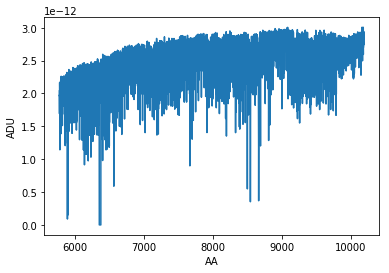

In [3]:
%matplotlib inline

template_file = '../data/xshooter_spec_fits_HD170820_480116_55410_UVB+VIS.fits'

hdu = fits.open(template_file)
data = hdu[0].data
header = hdu[0].header

template_spectra = data #/np.median(data)

template_lambdas = np.arange(header['NAXIS1'])*header['CDELT1'] + header['CRVAL1']
template_lambdas = np.e**template_lambdas

flux_unit = header['BUNIT']

# here is the template `Spectra`
template = fspec.Spectra(template_spectra, template_lambdas, wavelength_unit='AA', flux_unit=flux_unit)

template.clip(lambda_start/(1.+z)/1.2, lambda_end/(1.+z)*1.2)

print("Template wavelength range: {} (AA)".format(template.get_wavelength_range()))
print("Template delta_lambda: {:.2f} AA".format(template.get_delta_lambda()))
#print("Template Resolution: {:.2f}".format(template_R))

plt.plot(template.wavelengths, template.spectra)
plt.xlabel(template.wavelength_unit)
plt.ylabel(template.flux_unit)
plt.show()

## Simulate observed spectra

Template wavelength range: [ 9702.3006135 14197.6993865] (AA)
Template delta_lambda: 4.60 AA


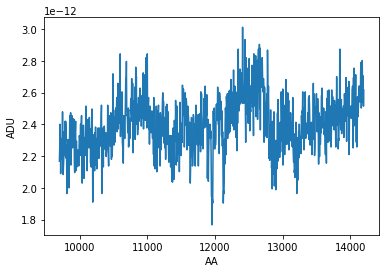

In [4]:
from fabspec.simSpec import SimSpec

sim = SimSpec(template, wavelength_range=(lambda_start, lambda_end), delta_lambda=(lambda_end-lambda_start)/pixels,
              resolution=R, redshift=z)

simulated_spectra = sim.simulate(vel_dis=200, signal_to_noise=20.)

lambda_range = np.array([simulated_spectra.wavelengths[0], simulated_spectra.wavelengths[-1]])
print("Template wavelength range: {} (AA)".format(lambda_range))
print("Template delta_lambda: {:.2f} AA".format(np.mean(np.diff(simulated_spectra.wavelengths))))

plt.plot(simulated_spectra.wavelengths, simulated_spectra.spectra)
plt.xlabel(simulated_spectra.wavelength_unit)
plt.ylabel(simulated_spectra.flux_unit)
plt.show()